In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [18]:
#Init dataframe 
birds = pd.read_excel("2007-2017 bird watch data.xlsx")

In [19]:
#Most and least common birds spotted
top_five = birds['Common_Name'].value_counts().head(5)
bottom_five = birds['Common_Name'].value_counts().tail(5)
print('top five most commonly spotted:\n{}'.format(top_five))
print('bottom five most commonly spotted:\n{}'.format(bottom_five))

top five most commonly spotted:
Common_Name
Northern Cardinal     914
Indigo Bunting        891
Field Sparrow         881
American Goldfinch    869
Chipping Sparrow      685
Name: count, dtype: int64
bottom five most commonly spotted:
Common_Name
Cooper's Hawk                  1
Unidentified Owl               1
Black-throated Blue Warbler    1
Summer Tanager                 1
Yellow-rumped Warbler          1
Name: count, dtype: int64


In [20]:
#Birds spotted each year
birds.groupby('Year')['Common_Name'].count()

Year
2007     197
2008     202
2009     160
2010     174
2011     160
2012     151
2013     198
2014     493
2015    4253
2016    3942
2017    4300
Name: Common_Name, dtype: int64

In [21]:
#Northern Cardinal spotting over time 
birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size()

Year
2007     17
2008     13
2009     14
2010     12
2011      8
2012     15
2013     15
2014     51
2015    250
2016    250
2017    269
dtype: int64

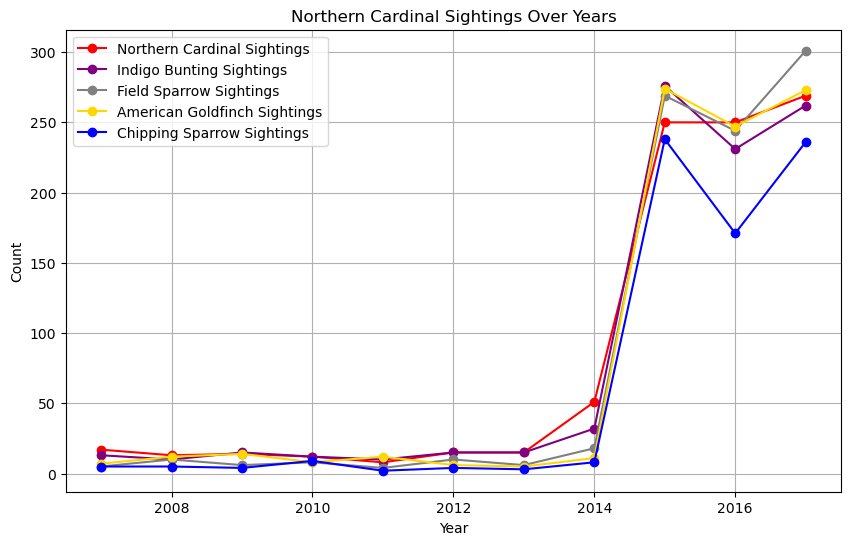

In [22]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds[birds['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds[birds['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds[birds['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds[birds['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds[birds['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Northern Cardinal Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
birds_early = birds[(birds['Year'] >= 2007) & (birds['Year'] <= 2014) & (birds['Common_Name'])]
birds_late = birds[(birds['Year'] > 2014) & (birds['Common_Name'])]

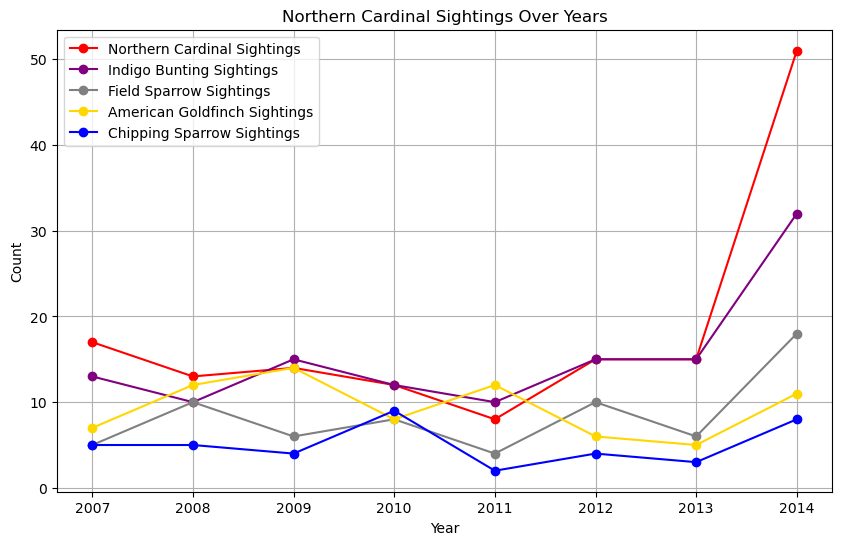

In [24]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_early[birds_early['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_early[birds_early['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Northern Cardinal Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

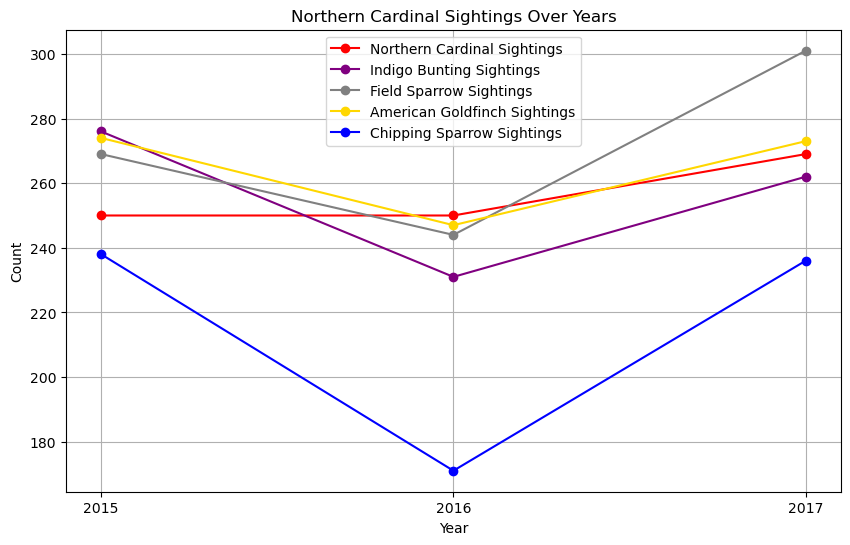

In [25]:
#plot of the top 5 most sited birds
plt.figure(figsize=(10, 6))
plt.plot(birds_late[birds_late['Common_Name'] == 'Northern Cardinal'].groupby('Year').size(), marker='o', linestyle='-', color='red', label='Northern Cardinal Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Indigo Bunting'].groupby('Year').size(), marker='o', linestyle='-', color='purple', label='Indigo Bunting Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Field Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='grey', label='Field Sparrow Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'American Goldfinch'].groupby('Year').size(), marker='o', linestyle='-', color='gold', label='American Goldfinch Sightings')
plt.plot(birds_late[birds_late['Common_Name'] == 'Chipping Sparrow'].groupby('Year').size(), marker='o', linestyle='-', color='blue', label='Chipping Sparrow Sightings')
plt.title('Northern Cardinal Sightings Over Years')
#change the ticks of x to only be whole numbers
plt.xticks(range(min(birds_late['Year']), max(birds_late['Year'])+1, 1))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()